In [1]:
from aind_registration_evaluation.util.file_conversion import n5_to_tiff, n5_to_tiff_warped, apply_mask, apply_mask_and_crop, downsample_and_int16

Convert N5 to Tiff with Scale level (confocal)

In [ ]:
 n5_to_tiff(n5_filename, output_path, scale_level)

Convert N5 to Tiff without Scale level (warped Cortical
)


In [ ]:
n5_to_tiff_warped( n5_filename, output_path)

Apply Mask and Crop image based on warped Image (converts to int16)

In [ ]:
apply_mask_and_crop(inFilepath_cortical, outFilepath_cortical, inFilepath_confocal, outFilepath_confocal, threshold)

Downsample with 2**Downscale_Factor (output int16)

In [2]:
downsample_and_int16('/root/capsule/scratch/cortical_s0_cropped.tif', '/scratch/cortical_s0_cropped_downsampled_f1.tif', 1)

Extract ROIs

Manually get ROI

In [9]:
import tifffile as tiff
import numpy as np

conf = tiff.imread("/scratch/confocal_s0_cropped_downsampled.tif")
cort = tiff.imread("/scratch/cortical_s0_cropped_downsampled.tif")

z_slice = 138
y_start, y_end = 195, 247
x_start, x_end = 5, 43

# Extract the specified slice and region
roi_conf = conf[z_slice, y_start:y_end, x_start:x_end]
roi_cort = cort[z_slice, y_start:y_end, x_start:x_end]

tiff.imwrite('/scratch/roi_confocal.tif', roi_conf)
tiff.imwrite('/scratch/roi_cortical.tif', roi_cort)


Apply Thresholding

In [21]:
from aind_registration_evaluation.util.file_conversion import apply_mask
apply_mask('/scratch/confocal_s0_cropped_downsampled.tif', '/scratch/masked_confocal.tif', 230, 0)
apply_mask('/scratch/cortical_s0_cropped_downsampled.tif', '/scratch/masked_cortical.tif', 1100, 0)

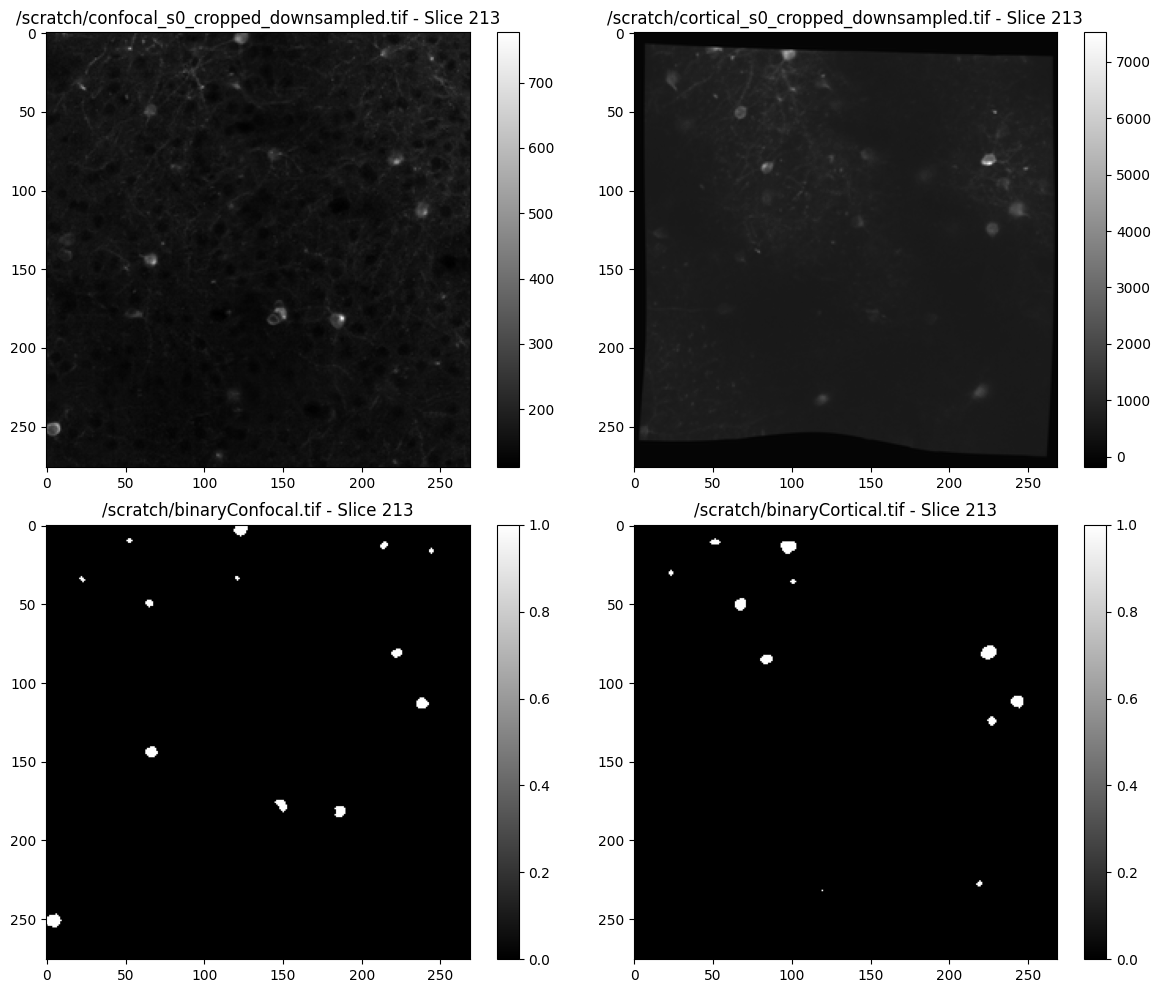

In [71]:


import tifffile as tiff
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
image_paths = [
    '/scratch/confocal_s0_cropped_downsampled.tif',
    '/scratch/cortical_s0_cropped_downsampled.tif',
    '/scratch/binaryConfocal.tif',
    '/scratch/binaryCortical.tif'
]
plt.figure(figsize=(12, 10))
for i, image_path in enumerate(image_paths):
    image = tiff.imread(image_path)
    slice_index = image.shape[0] // 2
    selected_slice = image[slice_index, :, :]
    plt.subplot(2, 2, i + 1)
    plt.imshow(selected_slice, cmap='gray')
    plt.title(f'{image_path} - Slice {slice_index}')
    plt.colorbar()
plt.tight_layout()
plt.show()


Visualize Binary Mask

In [ ]:
image = tiff.imread('path')
blurred_image = filters.gaussian(image, sigma=1)
binary_image = blurred_image > 0.05
opened_image = morphology.opening(binary_image, morphology.ball(1))
largeObjects = morphology.remove_small_objects(opened_image, 500)

images = [
    image,
    largeObjects
]
plt.figure(figsize=(12, 10))
for i, img in enumerate(image_paths):
    slice_index = img.shape[0] // 2
    selected_slice = img[slice_index, :, :]
    plt.subplot(2, 2, i + 1)
    plt.imshow(selected_slice, cmap='gray')
    plt.title(f'{img_path} - Slice {slice_index}')
    plt.colorbar()
plt.tight_layout()
plt.show()
